# Modelos de Clasificación 

## 1. Librerias y configuraciones previas


In [24]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Creación de modelos
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df.targetVar, ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df.targetVar, ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if tipo == 'c':
                sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
            if tipo == 'b':
                sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
            if tipo == 's':
                sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])
#plt.xticks(tick_marks, classes, rotation=45)

In [3]:
# Funcion para imprimir la curva ROC

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

## 3. Carga del dataset

In [4]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d = pd.read_csv("./Nacimientobalanceadologistica.csv")

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32110 entries, 0 to 32109
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AREANAC     32110 non-null  object 
 1   SIT_PARTO   32110 non-null  object 
 2   SEXO        32110 non-null  object 
 3   MES         32110 non-null  float64
 4   ATEN_PAR    32110 non-null  object 
 5   T_GES       32110 non-null  float64
 6   NUMCONSUL   32110 non-null  float64
 7   TIPO_PARTO  32110 non-null  object 
 8   MUL_PARTO   32110 non-null  object 
 9   IDHEMOCLAS  32110 non-null  object 
 10  IDFACTORRH  32110 non-null  object 
 11  EDAD_MADRE  32110 non-null  float64
 12  EST_CIVM    32110 non-null  object 
 13  NIV_EDUM    32110 non-null  object 
 14  N_HIJOSV    32110 non-null  float64
 15  N_EMB       32110 non-null  float64
 16  SEG_SOCIAL  32110 non-null  object 
 17  EDAD_PADRE  32110 non-null  float64
 18  NIV_EDUP    32110 non-null  object 
 19  COMUNA_RES  32110 non-nul

In [6]:
#Reemplazo de valores para la agrupación de categorías

d["BAJO_PESO"].replace("NO",0,inplace=True)
d["BAJO_PESO"].replace("SI",1,inplace=True)

# Cambiar el tipo de datos de object a float
d['BAJO_PESO'] = d['BAJO_PESO'].astype('int')

## 4. Visualización de datos

### Variables de entrada

In [7]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

d[numCols].head()

,MES,T_GES,NUMCONSUL,EDAD_MADRE,N_HIJOSV,N_EMB,EDAD_PADRE,BAJO_PESO
0,2.0,39.0,8.0,27.0,1.0,1.0,29.0,0
1,4.0,38.0,8.0,23.0,2.0,2.0,22.0,0
2,6.0,39.0,8.0,21.0,1.0,1.0,21.0,0
3,4.0,40.0,7.0,34.0,2.0,2.0,31.0,0
4,12.0,40.0,10.0,19.0,2.0,2.0,21.0,0


In [8]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('BAJO_PESO')

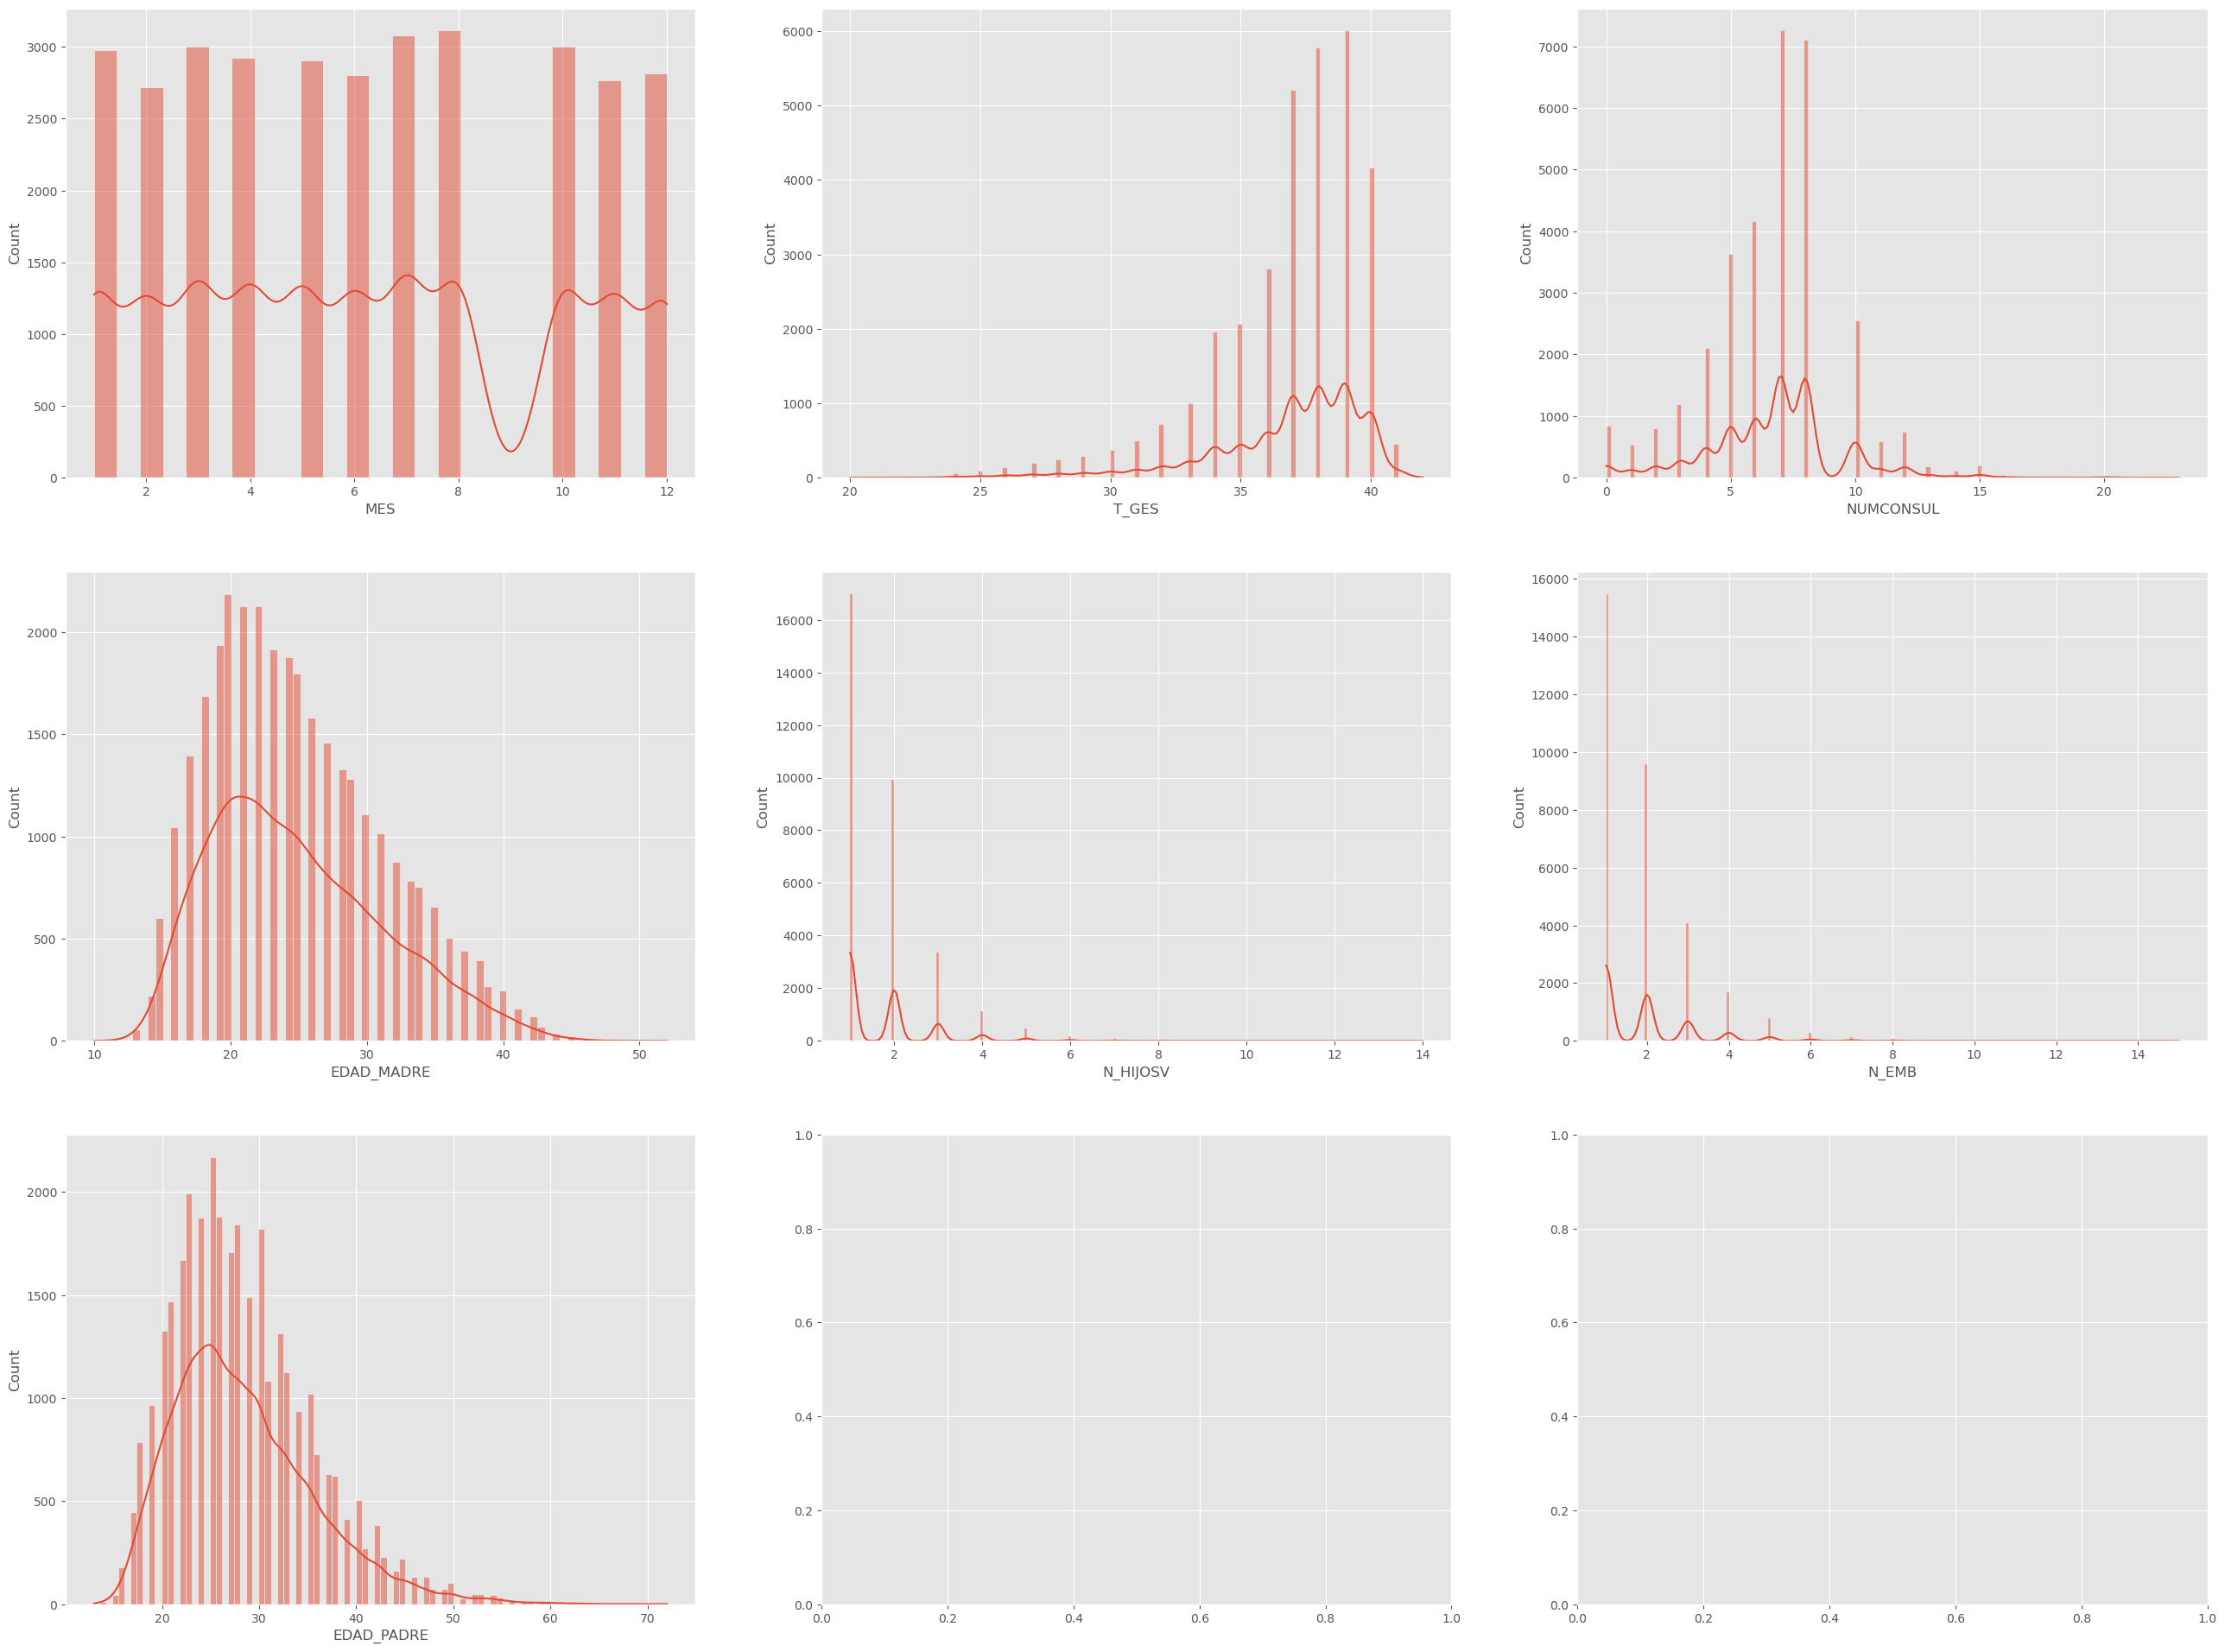

In [9]:
#Matriz de gráficos de histograma de todas las variables de entrada

# Se establecen la cantidad de columnas y filas para la matriz de gráficos
num_cols = 3
num_rows = 3

# Configuración del tamaño de la figura
figsize=(32,24)
plt.rcParams['figure.figsize'] = figsize
        
# Creación de la figura y los ejes
fig, axs = plt.subplots(num_rows, num_cols)

# Iteración sobre las columnas numéricas
for ind, col in enumerate(numCols):
    
    # Cálculo de las coordenadas de subtrama
    i = math.floor(ind/num_cols)
    j = ind - i*num_cols
    
    # Creación del histograma con estimación de densidad de kernel
    sns.histplot(d[col], ax=axs[i, j], kde=True)

### Variable de salida

In [10]:
# Distriución de la variable de salida

d['BAJO_PESO'].value_counts()

0    16055
1    16055
Name: BAJO_PESO, dtype: int64

## 5. Preparación de datos

In [11]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32110 entries, 0 to 32109
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   MES                                                  32110 non-null  float64
 1   T_GES                                                32110 non-null  float64
 2   NUMCONSUL                                            32110 non-null  float64
 3   EDAD_MADRE                                           32110 non-null  float64
 4   N_HIJOSV                                             32110 non-null  float64
 5   N_EMB                                                32110 non-null  float64
 6   EDAD_PADRE                                           32110 non-null  float64
 7   BAJO_PESO                                            32110 non-null  int32  
 8   AREANAC_Centro Poblado                               32110 non-nul

## 6. Creación del modelo

In [12]:
# División de los datos en train y test
# ==============================================================================

X = d.drop(columns = 'BAJO_PESO')
y = d['BAJO_PESO']

In [13]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [14]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['MES', 'T_GES', 'NUMCONSUL', 'EDAD_MADRE', 'N_HIJOSV', 'N_EMB', 'EDAD_PADRE']


In [15]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,MES,T_GES,NUMCONSUL,EDAD_MADRE,N_HIJOSV,N_EMB,EDAD_PADRE
23813,0.5455,0.8182,0.3478,0.1463,0.0000,0.0000,0.1017
9298,0.4545,0.8636,0.3043,0.4634,0.1538,0.1429,0.1525
9205,0.1818,0.8182,0.3478,0.2195,0.0000,0.0000,0.1525
18448,0.4545,0.7727,0.2174,0.1220,0.0000,0.0000,0.4576
10984,0.9091,0.7727,0.3478,0.0976,0.0000,0.0000,0.1186


### Creación del modelo

#### Creación y entrenamiento del modelo

##Creación y entrenamiento de los modelos 
modelLR        = LogisticRegression(random_state=0).fit(X_train, y_train)
modelSVC       = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
modelknn       = neighbors.KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
modelComplNB   = ComplementNB().fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
modelRanForest = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=0).fit(X_train, y_train)
ModelNN        = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=0).fit(X_train, y_train)


In [16]:
modelLR        = LogisticRegression().fit(X_train, y_train)
modelSVC_lin   = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
modelSVC_pol2  = svm.SVC(kernel='poly', degree = 2, probability = True).fit(X_train, y_train)
modelSVC_pol3  = svm.SVC(kernel='poly', degree = 3, probability = True).fit(X_train, y_train)
modelSVC_rbf   = svm.SVC(kernel='rbf', probability = True).fit(X_train, y_train)
modelSVC_sig   = svm.SVC(kernel='sigmoid', probability = True).fit(X_train, y_train)
modelknn       = neighbors.KNeighborsClassifier().fit(X_train, y_train)
modelComplNB   = ComplementNB().fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier().fit(X_train, y_train)
modelRanForest = RandomForestClassifier().fit(X_train, y_train)
ModelNN        = MLPClassifier().fit(X_train, y_train)


### Evaluación del modelo

In [17]:
y_LR       = modelLR.predict(X_test)
y_SVC_lin  = modelSVC_lin.predict(X_test)
y_SVC_pol2 = modelSVC_pol2.predict(X_test)
y_SVC_pol3 = modelSVC_pol3.predict(X_test)
y_SVC_rbf  = modelSVC_rbf.predict(X_test)
y_SVC_sig  = modelSVC_sig.predict(X_test)
y_knn      = modelknn.predict(X_test)
y_ComplNB  = modelComplNB.predict(X_test)
y_TreeClas = modelTreeClas.predict(X_test)
y_RanForest= modelRanForest.predict(X_test)
y_NN      = ModelNN.predict(X_test)

#### Exactitud (Accuracy)

In [18]:
print("="*5 + f" Accuracy de los modelos " + "="*20)
print()
print("modelLR       :",metrics.accuracy_score(y_test, y_LR       ))
print("modelSVC_lin  :",metrics.accuracy_score(y_test, y_SVC_lin  ))
print("modelSVC_pol2  :",metrics.accuracy_score(y_test, y_SVC_pol2))
print("modelSVC_pol3  :",metrics.accuracy_score(y_test, y_SVC_pol3))
print("modelSVC_rbf  :",metrics.accuracy_score(y_test, y_SVC_rbf  ))
print("modelSVC_sig  :",metrics.accuracy_score(y_test, y_SVC_sig  ))
print("modelknn      :",metrics.accuracy_score(y_test, y_knn      ))
print("modelComplNB  :",metrics.accuracy_score(y_test, y_ComplNB  ))
print("modelTreeClas :",metrics.accuracy_score(y_test, y_TreeClas ))
print("modelRanForest:",metrics.accuracy_score(y_test, y_RanForest))
print("ModelNN       :",metrics.accuracy_score(y_test, y_NN      ))


===== Accuracy de los modelos ====================

modelLR       : 0.8361881033945812
modelSVC_lin  : 0.8338523824353784
modelSVC_pol2  : 0.8310495172843351
modelSVC_pol3  : 0.8266895048271566
modelSVC_rbf  : 0.8277795079414513
modelSVC_sig  : 0.6012145748987854
modelknn      : 0.5879788227966366
modelComplNB  : 0.6105574587355964
modelTreeClas : 0.7412021177203364
modelRanForest: 0.8366552475864216
ModelNN       : 0.8137651821862348


#### Matriz de confusión

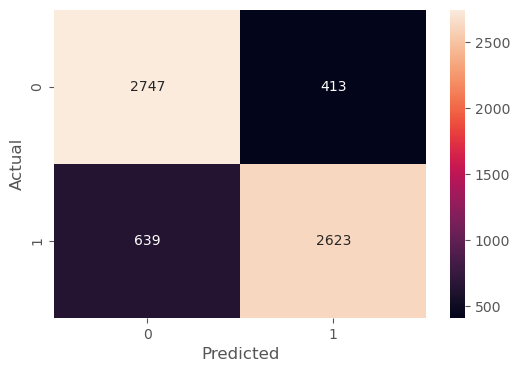

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3160
           1       0.86      0.80      0.83      3262

    accuracy                           0.84      6422
   macro avg       0.84      0.84      0.84      6422
weighted avg       0.84      0.84      0.84      6422



In [19]:
y_pred = y_LR

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

#### ROC - Receiver Operating Characteristic

0.91: LogisticRegression()
0.91: SVC(kernel='linear', probability=True)
0.91: SVC(degree=2, kernel='poly', probability=True)
0.91: SVC(kernel='poly', probability=True)
0.91: SVC(probability=True)
0.65: SVC(kernel='sigmoid', probability=True)
0.62: KNeighborsClassifier()
0.66: ComplementNB()
0.74: DecisionTreeClassifier()
0.90: RandomForestClassifier()
0.89: MLPClassifier()


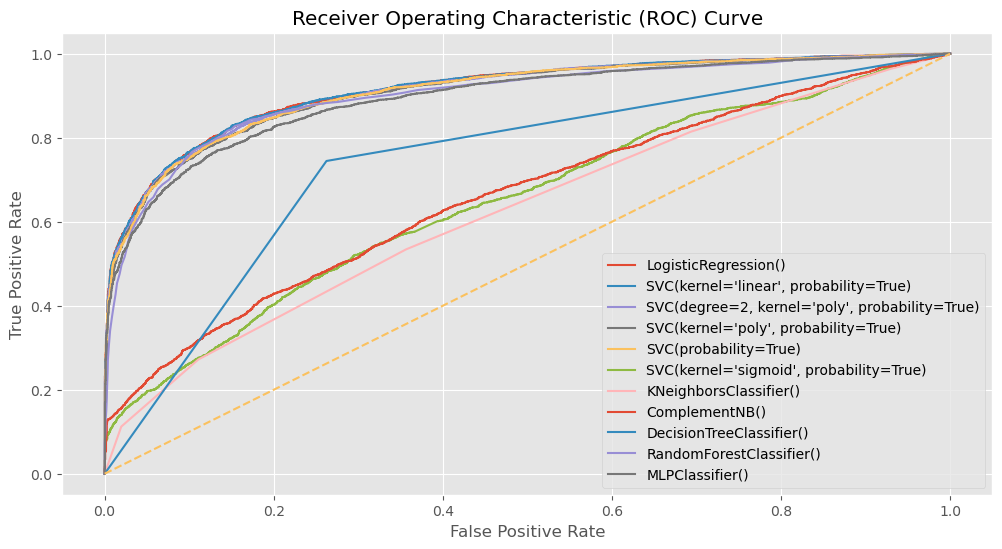

In [20]:
# Crear figura de tamaño 10x6
fig = plt.figure(figsize=(12, 6))  

# Lista de modelos a evaluar
Modelos = [modelLR, modelSVC_lin, modelSVC_pol2, modelSVC_pol3, modelSVC_rbf, modelSVC_sig,    modelknn, modelComplNB, modelTreeClas, modelRanForest, ModelNN]  

# Iterar sobre los modelos
for i in range(len(Modelos)):
    
    # Obtener probabilidades de predicción del modelo
    probs = Modelos[i].predict_proba(X_test)  
    
    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]  

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test, probs*(1))  

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test, probs*(1))  

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos[i])  

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos[i]))  


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')  
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico


In [21]:
print("="*5 + f" Accuracy de los modelos " + "="*20)
print()
print("modelLR       :",metrics.accuracy_score(y_test, y_LR       ))
print("modelSVC_lin  :",metrics.accuracy_score(y_test, y_SVC_lin  ))
print("modelSVC_pol2  :",metrics.accuracy_score(y_test, y_SVC_pol2))
print("modelSVC_pol3  :",metrics.accuracy_score(y_test, y_SVC_pol3))
print("modelSVC_rbf  :",metrics.accuracy_score(y_test, y_SVC_rbf  ))
print("modelSVC_sig  :",metrics.accuracy_score(y_test, y_SVC_sig  ))
print("modelknn      :",metrics.accuracy_score(y_test, y_knn      ))
print("modelComplNB  :",metrics.accuracy_score(y_test, y_ComplNB  ))
print("modelTreeClas :",metrics.accuracy_score(y_test, y_TreeClas ))
print("modelRanForest:",metrics.accuracy_score(y_test, y_RanForest))
print("ModelNN       :",metrics.accuracy_score(y_test, y_NN      ))

===== Accuracy de los modelos ====================

modelLR       : 0.8361881033945812
modelSVC_lin  : 0.8338523824353784
modelSVC_pol2  : 0.8310495172843351
modelSVC_pol3  : 0.8266895048271566
modelSVC_rbf  : 0.8277795079414513
modelSVC_sig  : 0.6012145748987854
modelknn      : 0.5879788227966366
modelComplNB  : 0.6105574587355964
modelTreeClas : 0.7412021177203364
modelRanForest: 0.8366552475864216
ModelNN       : 0.8137651821862348


In [22]:
# Datos
datos = {
    'Método': ['modelLR', 'modelSVMlin', 'modelSVMpoly2','modelSVMpoly3', 'modelSVMrbf',  'modelSVMsig', 'modelknn', 'modelComplNB', 'modelTreeClas', 'modelRanForest', 'ModelNN'],
    'Accuracy':[metrics.accuracy_score(y_test, y_LR), metrics.accuracy_score(y_test, y_SVC_lin), metrics.accuracy_score(y_test, y_SVC_pol2), metrics.accuracy_score(y_test, y_SVC_pol3), metrics.accuracy_score(y_test, y_SVC_rbf) ,metrics.accuracy_score(y_test, y_SVC_sig  ), metrics.accuracy_score(y_test, y_knn), metrics.accuracy_score(y_test, y_ComplNB), metrics.accuracy_score(y_test, y_TreeClas), metrics.accuracy_score(y_test, y_RanForest), metrics.accuracy_score(y_test, y_NN)],
    'AUC': [metrics.roc_auc_score(y_test, y_LR), metrics.roc_auc_score(y_test, y_SVC_lin), metrics.roc_auc_score(y_test, y_SVC_pol2), metrics.roc_auc_score(y_test, y_SVC_pol3), metrics.roc_auc_score(y_test, y_SVC_rbf) ,metrics.roc_auc_score(y_test, y_SVC_sig  ), metrics.roc_auc_score(y_test, y_knn), metrics.roc_auc_score(y_test, y_ComplNB), metrics.roc_auc_score(y_test, y_TreeClas), metrics.roc_auc_score(y_test, y_RanForest), metrics.roc_auc_score(y_test, y_NN)]
}

# Crear un DataFrame
df = pd.DataFrame(datos)
df


,Método,Accuracy,AUC
0,modelLR,0.8362,0.8367
1,modelSVMlin,0.8339,0.8344
2,modelSVMpoly2,0.8310,0.8317
3,modelSVMpoly3,0.8267,0.8273
4,modelSVMrbf,0.8278,0.8287
5,modelSVMsig,0.6012,0.6010
6,modelknn,0.5880,0.5888
7,modelComplNB,0.6106,0.6138
8,modelTreeClas,0.7412,0.7411
9,modelRanForest,0.8367,0.8368


###  Grid Search basado en validación cruzada

In [35]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [100,150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
40,entropy,10,9,100,0.8336,0.0048,0.8343,0.0014
41,entropy,10,9,150,0.8336,0.0048,0.8342,0.0013
14,gini,10,7,100,0.8336,0.0048,0.8345,0.0015
38,entropy,10,7,100,0.8336,0.0048,0.8344,0.0012


In [36]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 100} : 0.8335797361709176 accuracy


In [37]:
modelo_final = grid.best_estimator_

In [38]:
modelo_final

RandomForestClassifier(max_depth=10, max_features=7, random_state=123)

In [39]:
# Error de test del modelo final
# ==============================================================================
y_pred = modelo_final.predict(X_test)

#### Evaluación del modelo

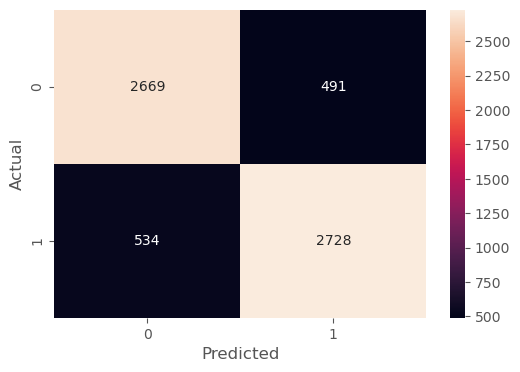

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      3160
           1       0.85      0.84      0.84      3262

    accuracy                           0.84      6422
   macro avg       0.84      0.84      0.84      6422
weighted avg       0.84      0.84      0.84      6422



In [40]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

In [48]:
metrics.accuracy_score(y_test, y_pred)

0.8403924011211461

In [43]:
metrics.roc_auc_score(y_test, y_pred)

0.8404585018121989

### Importancia de predictores

#### Importancia por pureza de nodos

In [42]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,T_GES,0.6949
20,MUL_PARTO_simple,0.0642
18,MUL_PARTO_Doble,0.0560
2,NUMCONSUL,0.0514
17,TIPO_PARTO_Instrumentado,0.0137
...,...,...
9,SIT_PARTO_Institución de salud,0.0001
10,SIT_PARTO_Otro,0.0000
7,AREANAC_Centro Poblado,0.0000
15,ATEN_PAR_Promotor(a) de salud,0.0000


### Método de Validacion Cruzada (Cross Validation)

In [52]:
# la validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

#### Escalar variables

In [53]:
# Escalar Variables

#num_vars = numCols

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[numCols] = scaler.fit_transform(X_Completo[numCols])

In [64]:

# Se definen los Pliegues (Folks)
CV = 10# la validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

#### Escalar variables

# Escalar Variables

#num_vars = numCols

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[numCols] = scaler.fit_transform(X_Completo[numCols])


# Definición de metricas a evaluar el modelo
scoring = {
    'accuracy': 'accuracy',
    'roc':'roc_auc',
    }


#Se se ejecuta una validación cruzada utilizando las métricas definidas anteriormente
scores1 = cross_validate(modelo_final, X_Completo, y_Completo,cv=CV, scoring= scoring)
scores2 = cross_validate(modelLR , X_Completo, y_Completo,cv=CV, scoring= scoring)


In [65]:
scores1

{'fit_time': array([0.84769344, 0.86023116, 0.89157033, 0.8782177 , 0.81838989,
        0.80003047, 0.80105829, 0.82909799, 0.8323431 , 0.81674504]),
 'score_time': array([0.05229783, 0.05583906, 0.05623031, 0.05300021, 0.05156946,
        0.05047536, 0.05081415, 0.05538297, 0.05424309, 0.05128503]),
 'test_accuracy': array([0.8150109 , 0.81594519, 0.83369667, 0.8414824 , 0.84272812,
        0.83836811, 0.83587667, 0.83213952, 0.84864528, 0.84521956]),
 'test_roc': array([0.88291415, 0.88329939, 0.89084081, 0.90420852, 0.89791475,
        0.8931243 , 0.88918852, 0.88312132, 0.90927014, 0.89987663])}

In [66]:
# Se convierte scores en un dataframe
cv_dfl1 = pd.DataFrame(scores1, columns=['fit_time', 
                                       'score_time','test_accuracy', 
                                       'test_roc',
                                       ])

# Se convierte scores en un dataframe
cv_dfl2 = pd.DataFrame(scores2, columns=['fit_time', 
                                       'score_time','test_accuracy', 
                                       'test_roc',
                                        ])


In [67]:
cv_dfl1

,fit_time,score_time,test_accuracy,test_roc
0,0.8477,0.0523,0.8150,0.8829
1,0.8602,0.0558,0.8159,0.8833
2,0.8916,0.0562,0.8337,0.8908
3,0.8782,0.0530,0.8415,0.9042
4,0.8184,0.0516,0.8427,0.8979
5,0.8000,0.0505,0.8384,0.8931
6,0.8011,0.0508,0.8359,0.8892
7,0.8291,0.0554,0.8321,0.8831
8,0.8323,0.0542,0.8486,0.9093
9,0.8167,0.0513,0.8452,0.8999


In [68]:
cv_dfl2

,fit_time,score_time,test_accuracy,test_roc
0,0.1440,0.0050,0.8153,0.8936
1,0.1347,0.0052,0.8097,0.8957
2,0.1442,0.0051,0.8275,0.9100
3,0.1405,0.0047,0.8396,0.9135
4,0.1337,0.0046,0.8412,0.9117
5,0.1392,0.0053,0.8371,0.9117
6,0.1347,0.0053,0.8312,0.9061
7,0.1450,0.0047,0.8244,0.8995
8,0.1365,0.0045,0.8465,0.9169
9,0.1359,0.0040,0.8381,0.9105


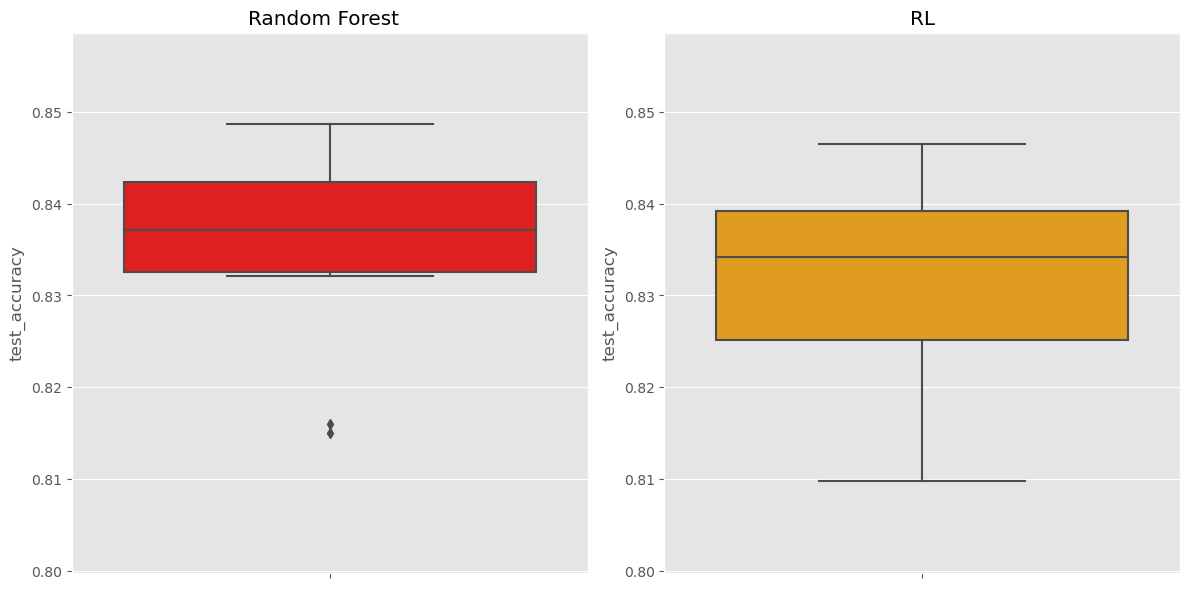

In [71]:

# Crear una figura con dos subtramas, una al lado de la otra
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar los datos de cv_dfl1 en la primera subtrama
sns.boxplot(y='test_accuracy', data=cv_dfl1, ax=ax1, color='red')
ax1.set_title('Random Forest  ')  # Título para la primera subtrama

# Graficar los datos de cv_dfl2 en la segunda subtrama
sns.boxplot(y='test_accuracy', data=cv_dfl2, ax=ax2, color='orange')
ax2.set_title('RL')  # Título para la segunda subtrama

# Obtener los límites máximos y mínimos de ambos conjuntos de datos
y_min = min(cv_dfl1['test_accuracy'].min(), cv_dfl2['test_accuracy'].min())
y_max = max(cv_dfl1['test_accuracy'].max(), cv_dfl2['test_accuracy'].max())

# Establecer los mismos límites en ambas subtramas
ax1.set_ylim(y_min-0.01, y_max+0.01)
ax2.set_ylim(y_min-0.01, y_max+0.01)

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar el gráfico con las dos subtramas
plt.show()

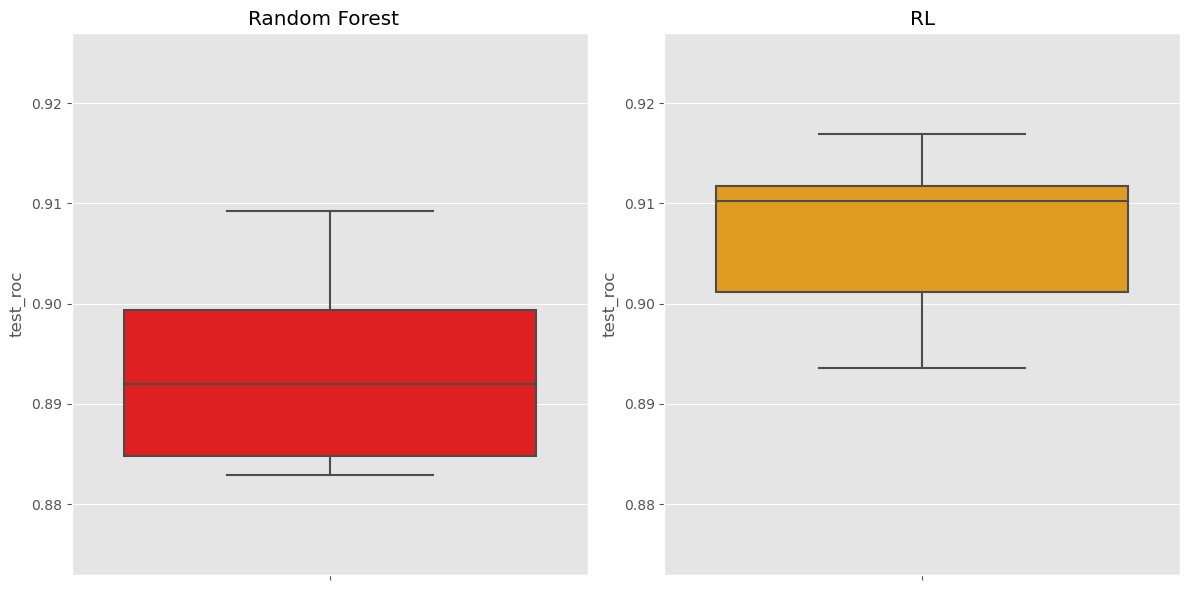

In [73]:

# Crear una figura con dos subtramas, una al lado de la otra
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Graficar los datos de cv_dfl1 en la primera subtrama
sns.boxplot(y='test_roc', data=cv_dfl1, ax=ax1, color='red')
ax1.set_title('Random Forest  ')  # Título para la primera subtrama

# Graficar los datos de cv_dfl2 en la segunda subtrama
sns.boxplot(y='test_roc', data=cv_dfl2, ax=ax2, color='orange')
ax2.set_title('RL')  # Título para la segunda subtrama

# Obtener los límites máximos y mínimos de ambos conjuntos de datos
y_min = min(cv_dfl1['test_roc'].min(), cv_dfl2['test_roc'].min())
y_max = max(cv_dfl1['test_roc'].max(), cv_dfl2['test_roc'].max())

# Establecer los mismos límites en ambas subtramas
ax1.set_ylim(y_min-0.01, y_max+0.01)
ax2.set_ylim(y_min-0.01, y_max+0.01)

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar el gráfico con las dos subtramas
plt.show()

#### Referencias


- Random Forest
    - https://www.cienciadedatos.net/documentos/py08_random_forest_python.html
    - https://fhernanb.github.io/libro_mod_pred/rand-forests.html
    - https://quantdare.com/decision-trees-gini-vs-entropy/
    

#### Referencias


- Maquinas de vectores de soporte

    - https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python


- *scikit-learn:*   
    - https://scikit-learn.org/stable/modules/svm.html
    
    ROC
    - https://stackabuse.com/understanding-roc-curves-with-python/



- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180



- *Analítica de grandes datos:*
    - https://jdvelasq.github.io/courses/analitica-de-grandes-datos/index.html